In [1]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('../inputs/progBook.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [3]:
data.head(5)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [4]:
def average_word_length(x):
    splited = x.split(' ')
    aux = 0
    for word in splited:
        aux += len(word)
    aux /= len(splited) 
    return aux

def number_of_words(x):
    splited = x.split(' ')
    return len(splited)

data['Title_Average_Word_Length'] = data.Book_title.apply(average_word_length)
data['Title_Number_Of_Words'] = data.Book_title.apply(number_of_words)
data['Description_Average_Word_Length'] = data.Description.apply(average_word_length)
data['Description_Number_Of_Words'] = data.Description.apply(number_of_words)

lencoder = LabelEncoder()
lencoder.fit(data.Type)
data.Type = lencoder.transform(data.Type)

data.Reviews = data.Reviews.apply(lambda x : int(x.replace(',','')))

data.head(5)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Title_Average_Word_Length,Title_Number_Of_Words,Description_Average_Word_Length,Description_Number_Of_Words
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,1,9.323529,4.500000,4,5.486486,37
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,1,11.000000,4.750000,8,5.258065,62
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,2,11.267647,6.500000,6,6.290909,55
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,1,12.873529,4.666667,12,5.620690,58
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,2,13.164706,4.666667,3,4.953846,65


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

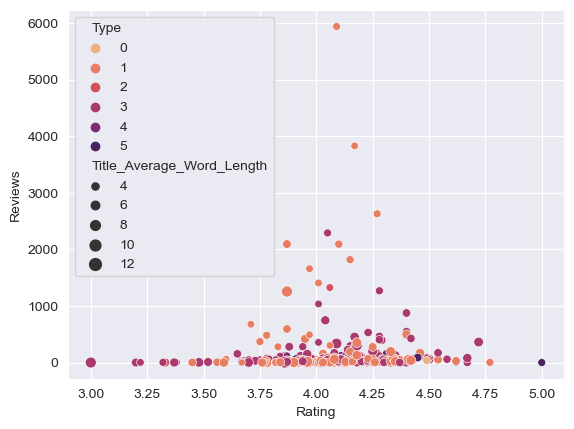

In [5]:
sns.scatterplot(x="Rating", y="Reviews", data= data, hue="Type", size="Title_Average_Word_Length", palette = "flare")

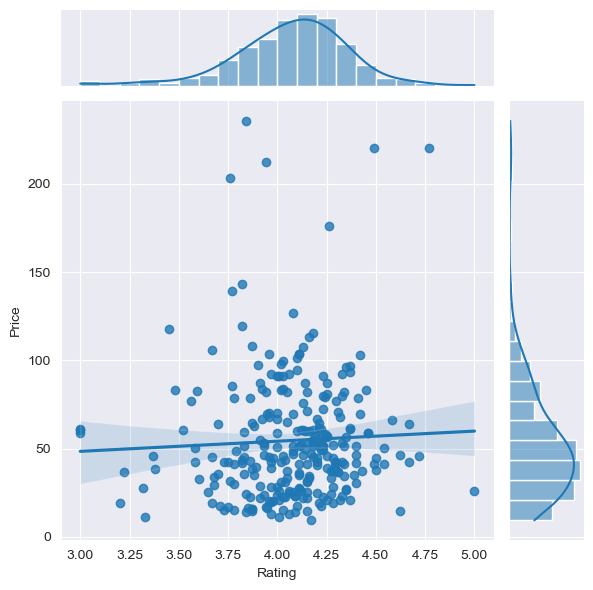

In [6]:
sns.jointplot(x="Rating", y="Price", data=data, kind="reg", palette = "viridis")

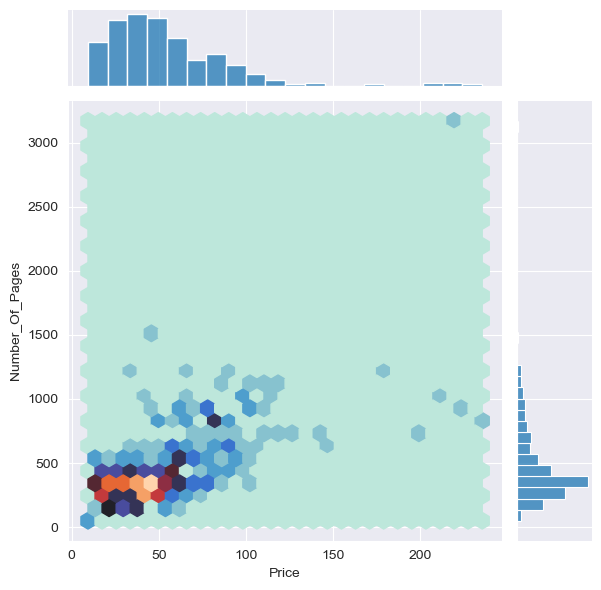

In [7]:
sns.jointplot(x="Price", y="Number_Of_Pages", data=data, kind ="hex", cmap ="icefire")

In [8]:
fig = px.scatter(data,
                x="Price",
                y="Rating",
                size="Number_Of_Pages",
                color="Price")
fig.show()

In [9]:
fig = px.line(data,
             x = "Description_Number_Of_Words",
             y = "Description_Average_Word_Length",
             color = "Type")
fig.show()

In [10]:
fig = px.bar(data,
             x="Title_Number_Of_Words",
             y = "Rating",
             color="Type")
fig.show()

In [11]:
fig = px.bar(data,
             x="Title_Number_Of_Words",
             color="Type")
fig.show()

In [12]:
fig = px.pie(data,
            values="Type",
            names="Title_Number_Of_Words",
            title="Number of words in the title of the book by book type")
fig.show()

c:\Users\mert7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



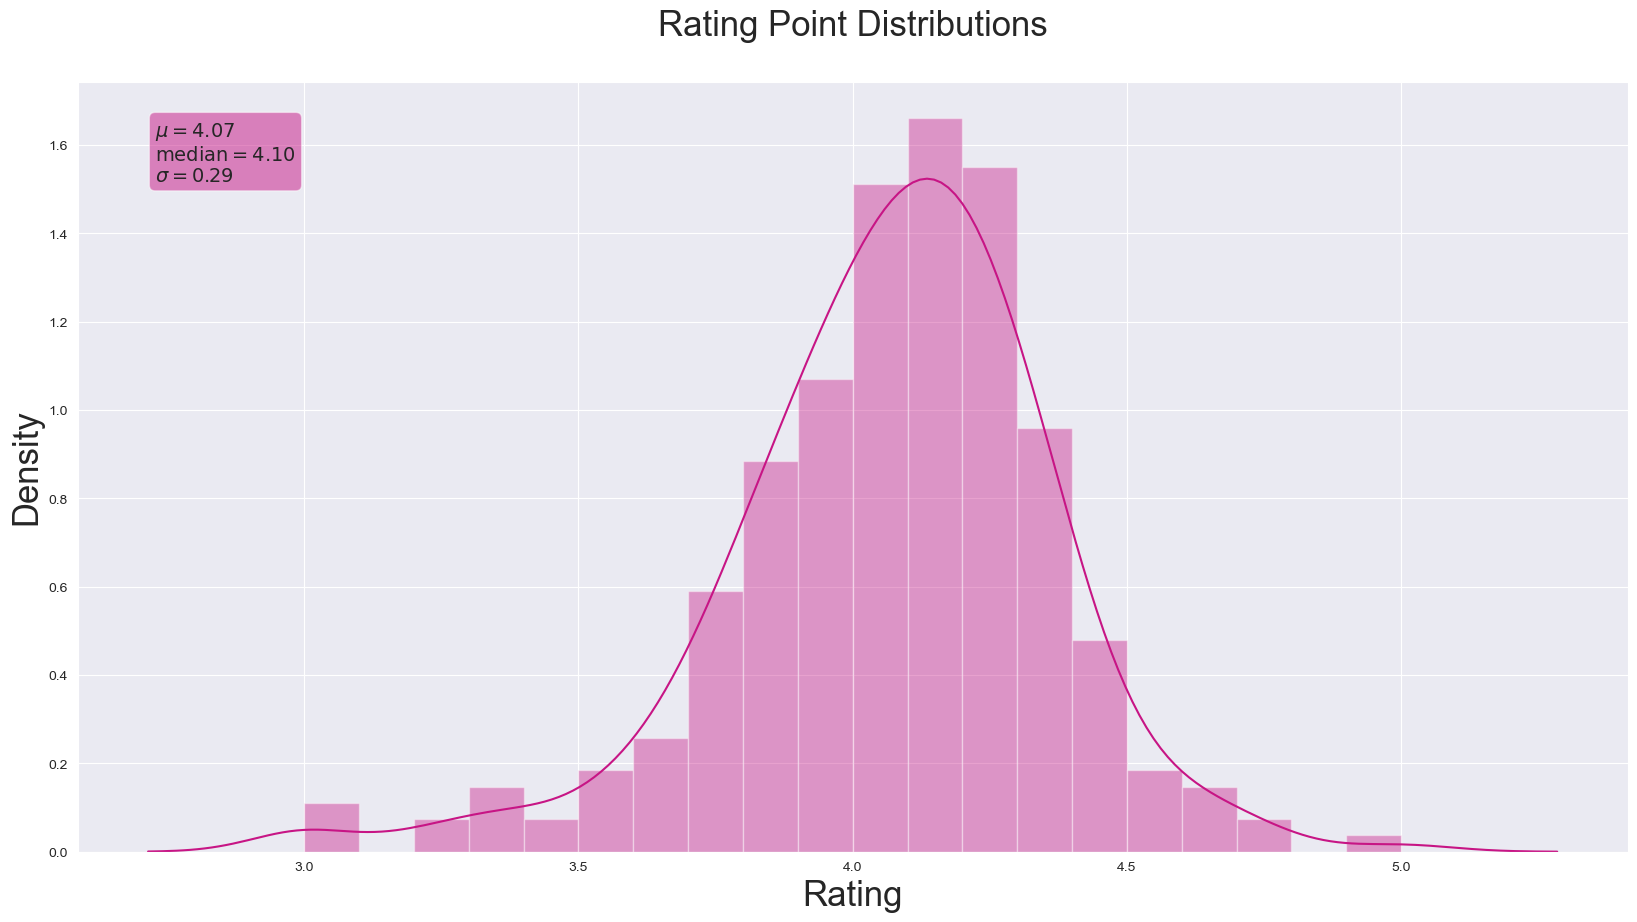

In [13]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.Rating,label = "Ratings",color='mediumvioletred')
ax.set_xlabel("Rating",fontsize = 25)
ax.set_ylabel("Density",fontsize = 25)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (data.Rating.mean(),), r'$\mathrm{median}=%.2f$' % (data.Rating.median(),),
         r'$\sigma=%.2f$' % (data.Rating.std(),)))
props = dict(boxstyle='round', facecolor='mediumvioletred', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

ax.set_title('Rating Point Distributions\n', fontsize=25)
plt.show()
warnings.filterwarnings('ignore')

# It can be said that the ratings are around 4.0.

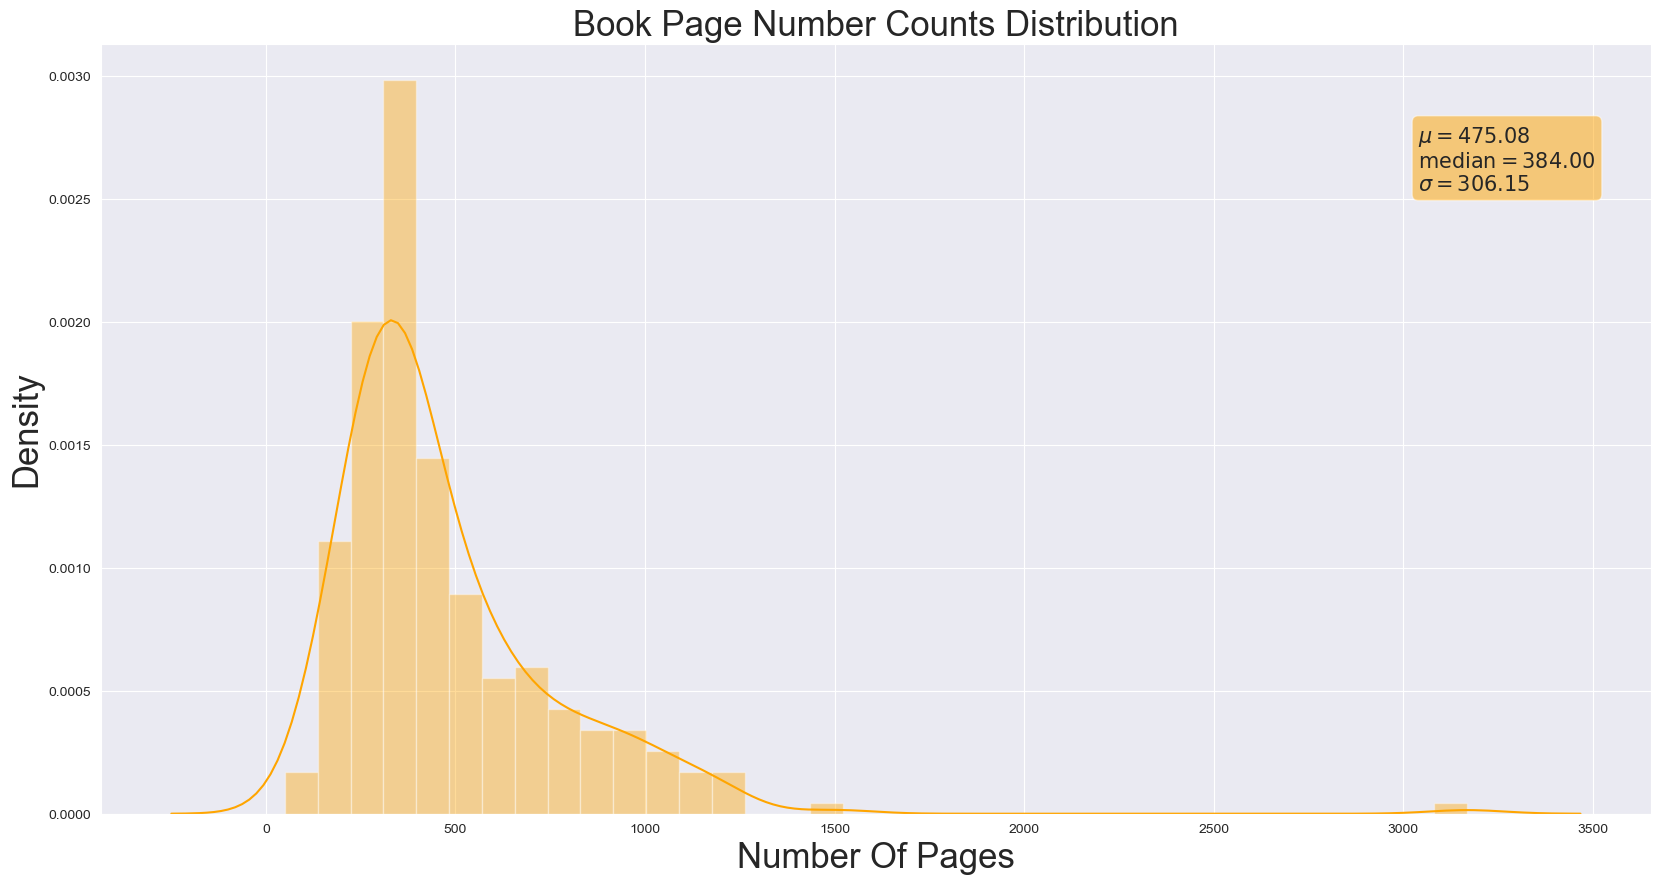

In [14]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.Number_Of_Pages,label="Number_Of_Pages",color='orange')
ax.set_xlabel("Number Of Pages",fontsize=25)
ax.set_ylabel("Density",fontsize=25)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (data.Number_Of_Pages.mean(),), r'$\mathrm{median}=%.2f$' % (data.Number_Of_Pages.median(),),
         r'$\sigma=%.2f$' % (data.Number_Of_Pages.std(),)))
props = dict(boxstyle='round', facecolor='orange', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=15,
            verticalalignment='center', bbox=props)

ax.set_title('Book Page Number Counts Distribution',fontsize=25)
plt.show()
warnings.filterwarnings('ignore')

# it is seen that the average number of pages is 475 and the median is 384.

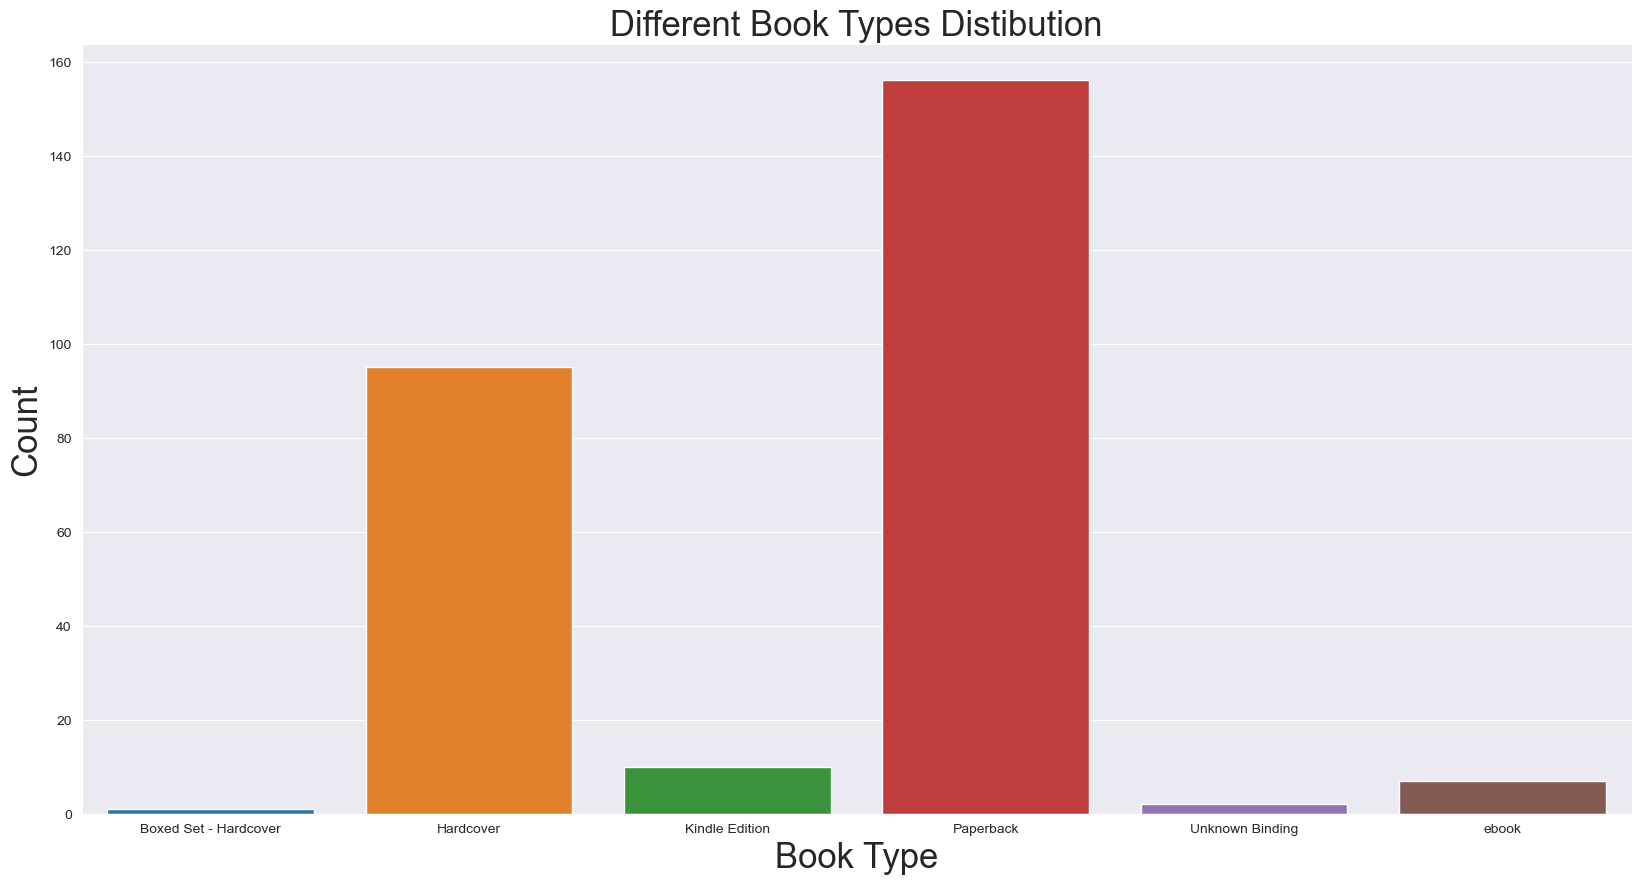

In [15]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = data["Type"])
ax.set(xticklabels = (['Boxed Set - Hardcover', 'Hardcover', 'Kindle Edition',
       'Paperback', 'Unknown Binding', 'ebook']))
ax.set_xlabel("Book Type", fontsize=25)
ax.set_ylabel("Count", fontsize=25)
ax.set_title('Different Book Types Distibution', fontsize=25)
warnings.filterwarnings('ignore')

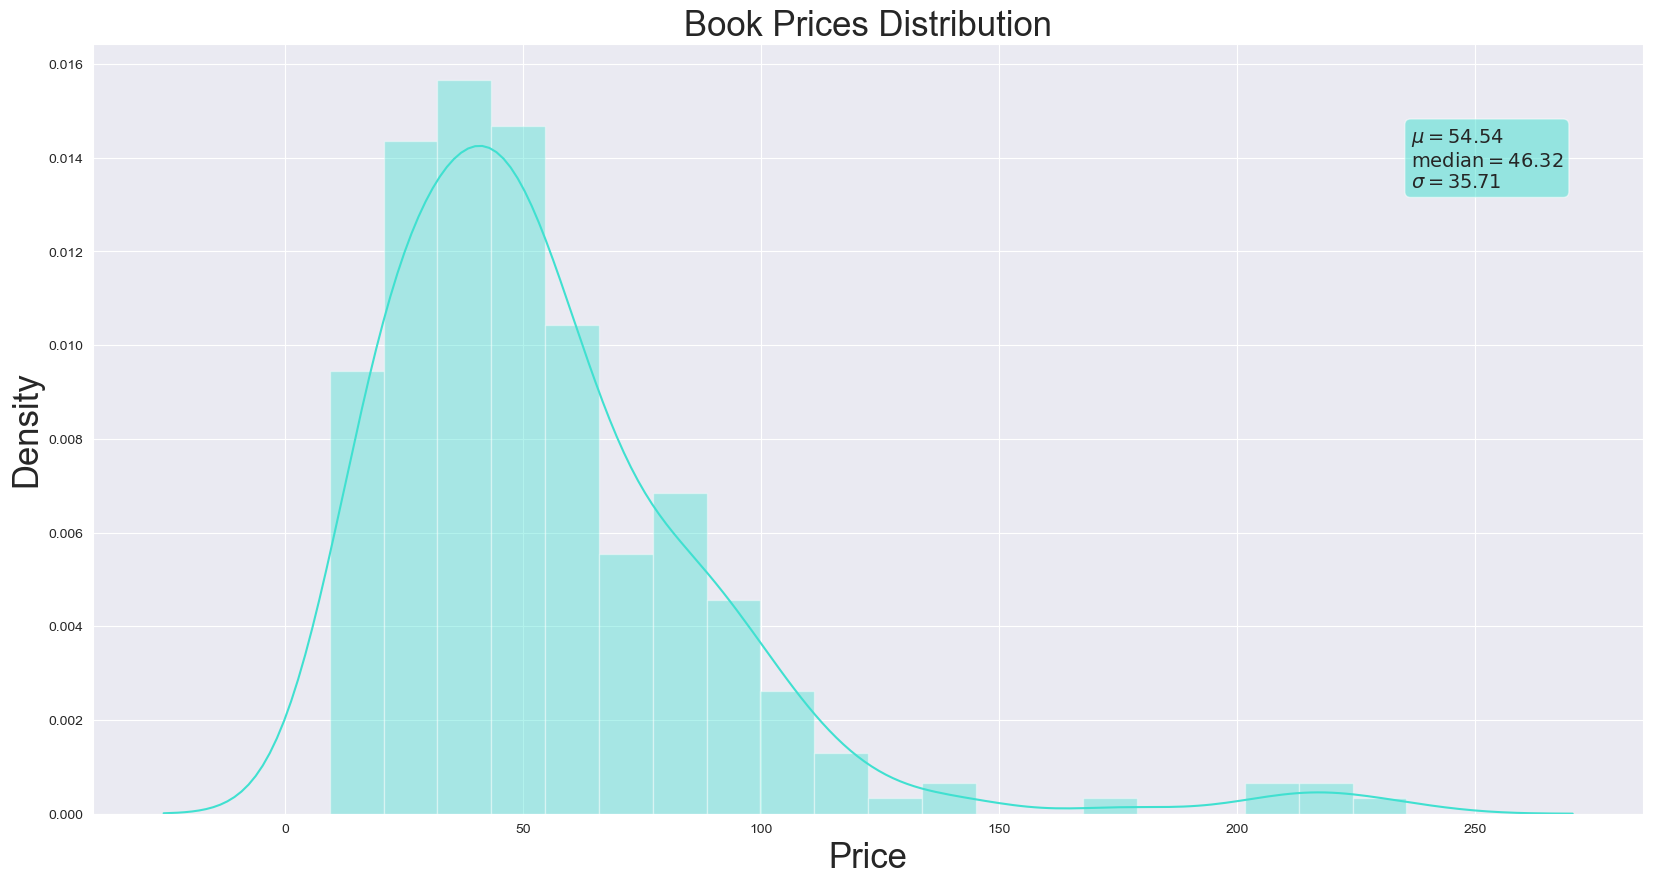

In [16]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.Price,label="Price",color ='turquoise')
ax.set_xlabel("Price",fontsize=25)
ax.set_ylabel("Density",fontsize=25)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (data.Price.mean(),), r'$\mathrm{median}=%.2f$' % (data.Price.median(),),
         r'$\sigma=%.2f$' % (data.Price.std(),)))
props = dict(boxstyle='round', facecolor='turquoise', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='center', bbox=props)

ax.set_title('Book Prices Distribution',fontsize=25)
plt.show()
warnings.filterwarnings('ignore')

# It is seen that the average book price is about 54 and the median is 46.

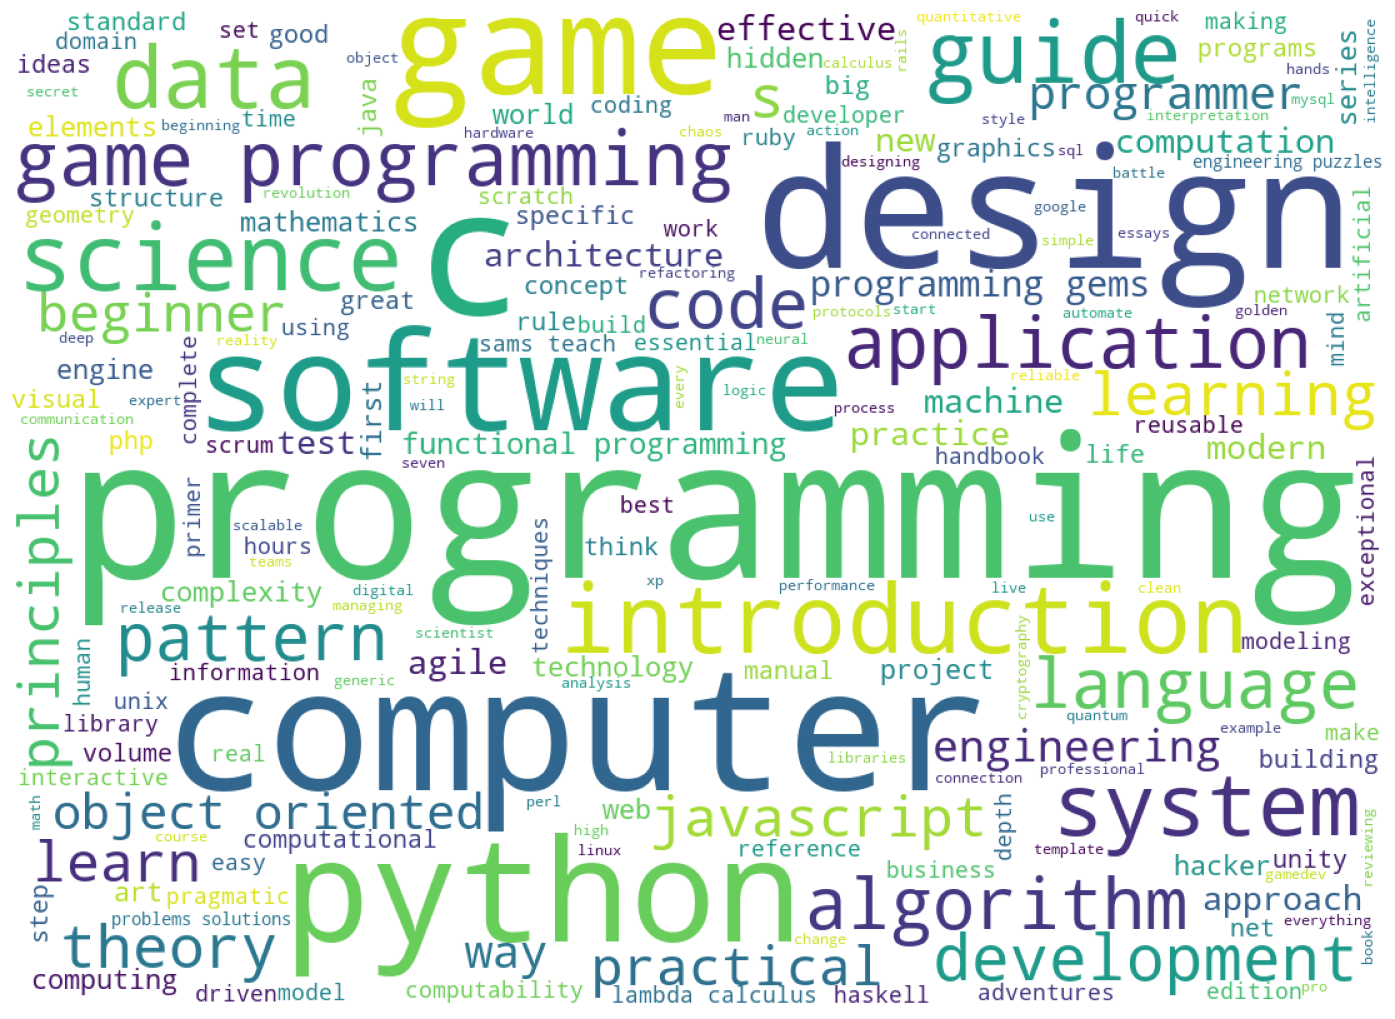

In [17]:
from wordcloud import WordCloud, STOPWORDS
import re

stopwords = list(STOPWORDS)

title_w = ''

for word in data.Book_title:
    word = word.lower()
    splited = re.findall(r'\b[A-Za-z]+\b',word)
    splited = [w for w in splited if w not in stopwords]
    title_w += ' '.join(splited)+ ' '


wordcloud = WordCloud(width = 1100, 
                      height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 8).generate(title_w) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 10), 
           facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Most common words in book titles

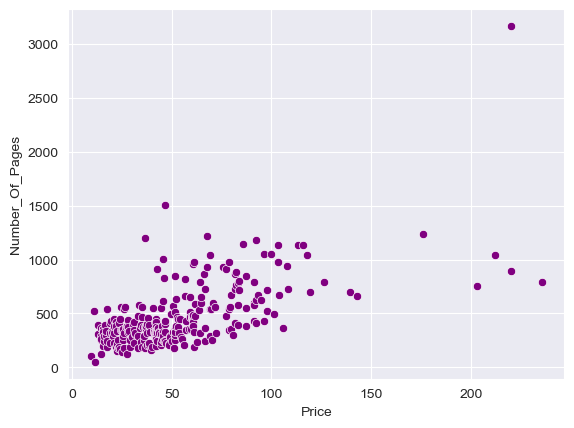

In [22]:
price_df = data['Price']
number_of_pages_df = data['Number_Of_Pages']

sns.scatterplot(x = price_df, y = number_of_pages_df, color="purple")
plt.show()

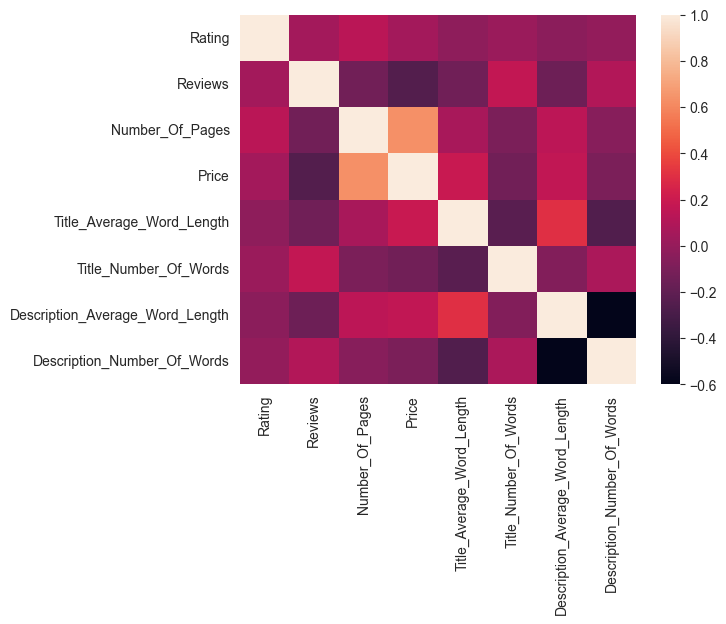

In [ ]:
list_x = ["Rating","Reviews","Number_Of_Pages", "Price", "Title_Average_Word_Length", "Title_Number_Of_Words", "Description_Average_Word_Length", "Description_Number_Of_Words"]
sns.heatmap(data[list_x].corr())
plt.show()

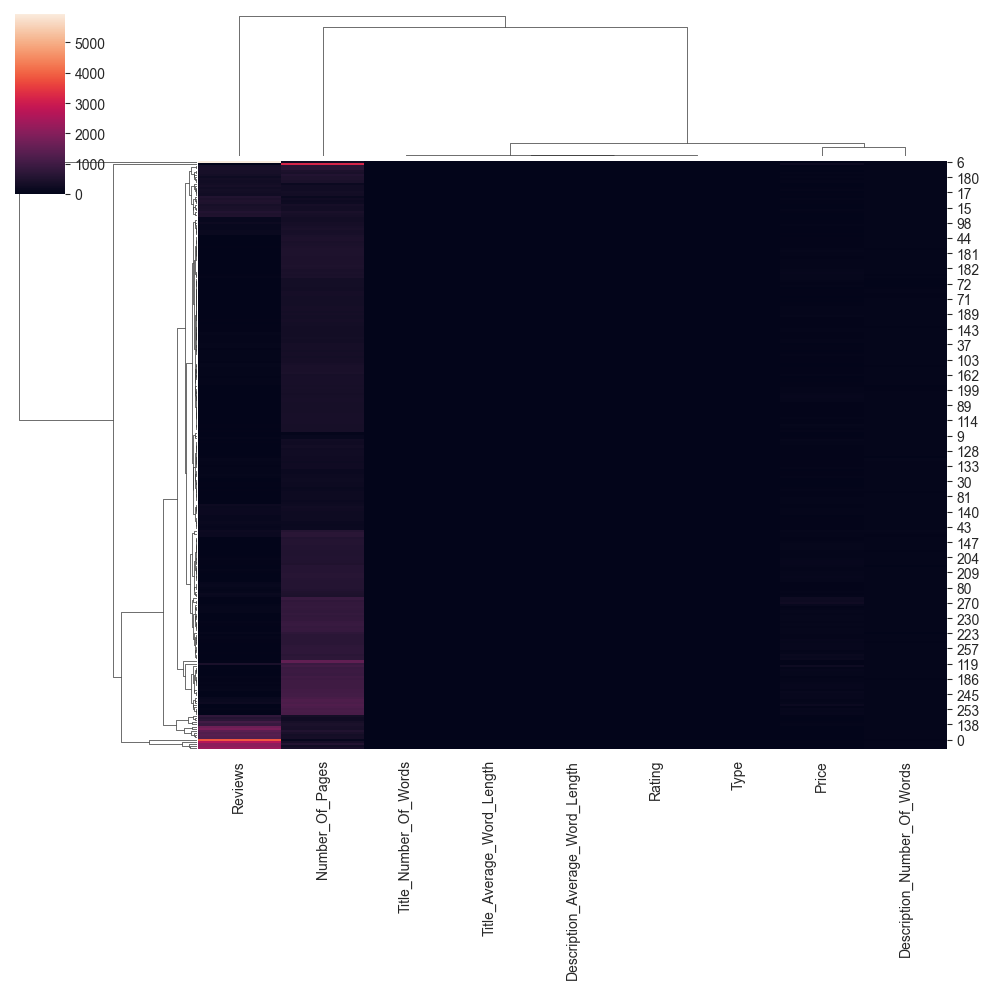

In [ ]:
sns.clustermap(data.drop(["Book_title","Description"], axis=1))

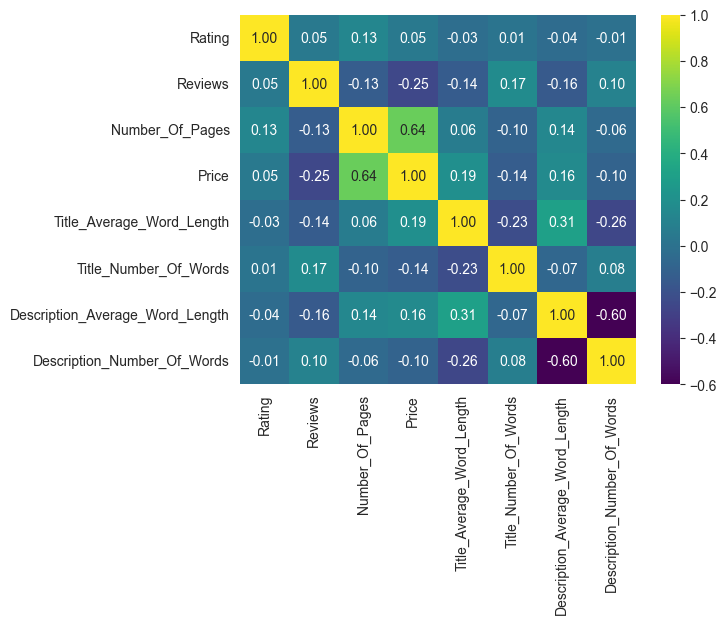

In [ ]:
list_x = ["Rating","Reviews","Number_Of_Pages", "Price", "Title_Average_Word_Length", "Title_Number_Of_Words", "Description_Average_Word_Length", "Description_Number_Of_Words"]
sns.heatmap(data[list_x].corr(method = "pearson"), annot = True, fmt = ".2f", cmap="viridis")
plt.show()

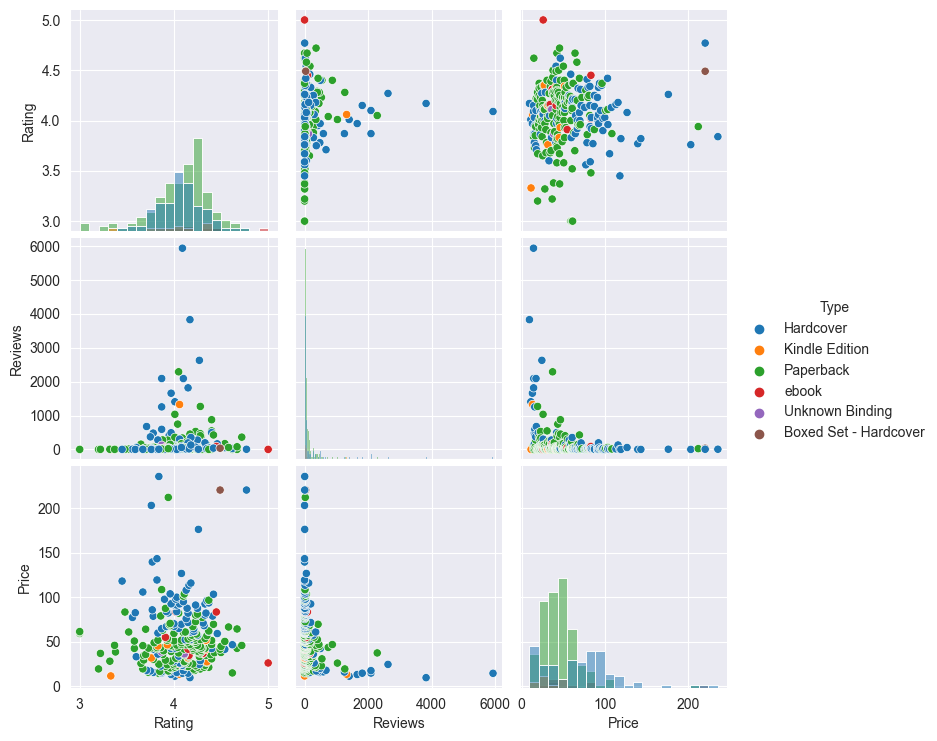

In [ ]:
dropped_data = data.drop(["Book_title", "Description", "Number_Of_Pages", "Title_Average_Word_Length", "Title_Number_Of_Words", "Description_Average_Word_Length", "Description_Number_Of_Words"],axis =1)

dropped_data['Type'] = dropped_data['Type'].replace(to_replace= [0, 1, 2, 3, 4, 5], value = ['Boxed Set - Hardcover', 'Hardcover', 'Kindle Edition',
       'Paperback', 'Unknown Binding', 'ebook'])
sns.pairplot(dropped_data, hue= "Type",diag_kind="hist") 
plt.show()

# Price and number of pages correlation

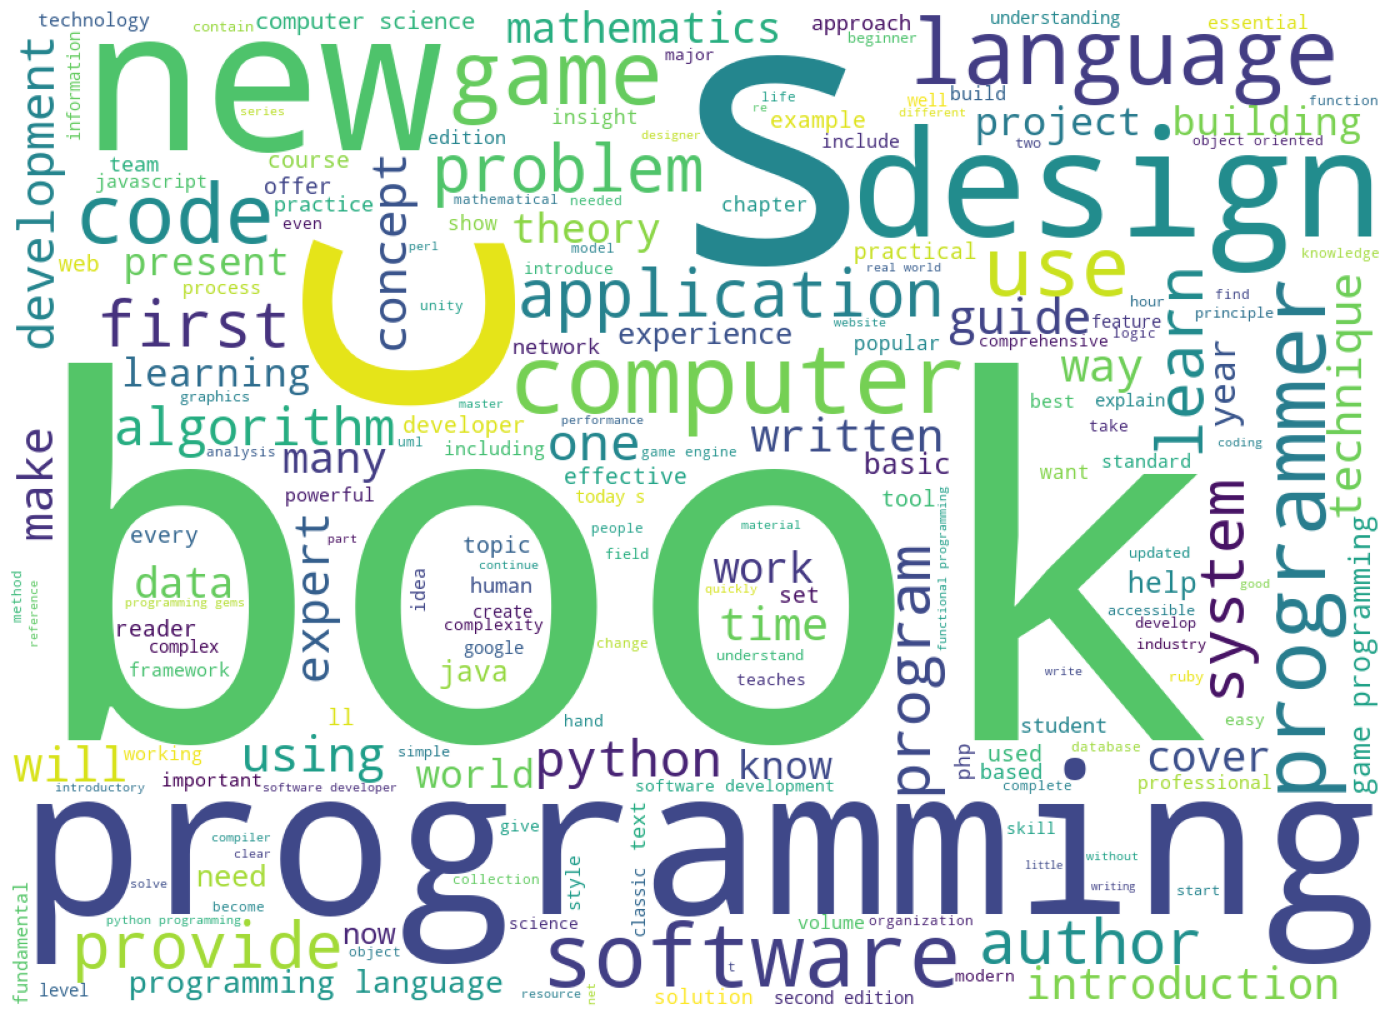

In [ ]:
desc_w = ''

for word in data.Description:
    word = word.lower()
    splited = re.findall(r'\b[A-Za-z]+\b',word)
    splited = [w for w in splited if w not in stopwords]
    desc_w += ' '.join(splited)+ ' '


wordcloud = WordCloud(width = 1100, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(desc_w) 
                       
plt.figure(figsize = (20, 10), 
           facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Most used words in Description

<Figure size 2000x1000 with 0 Axes>

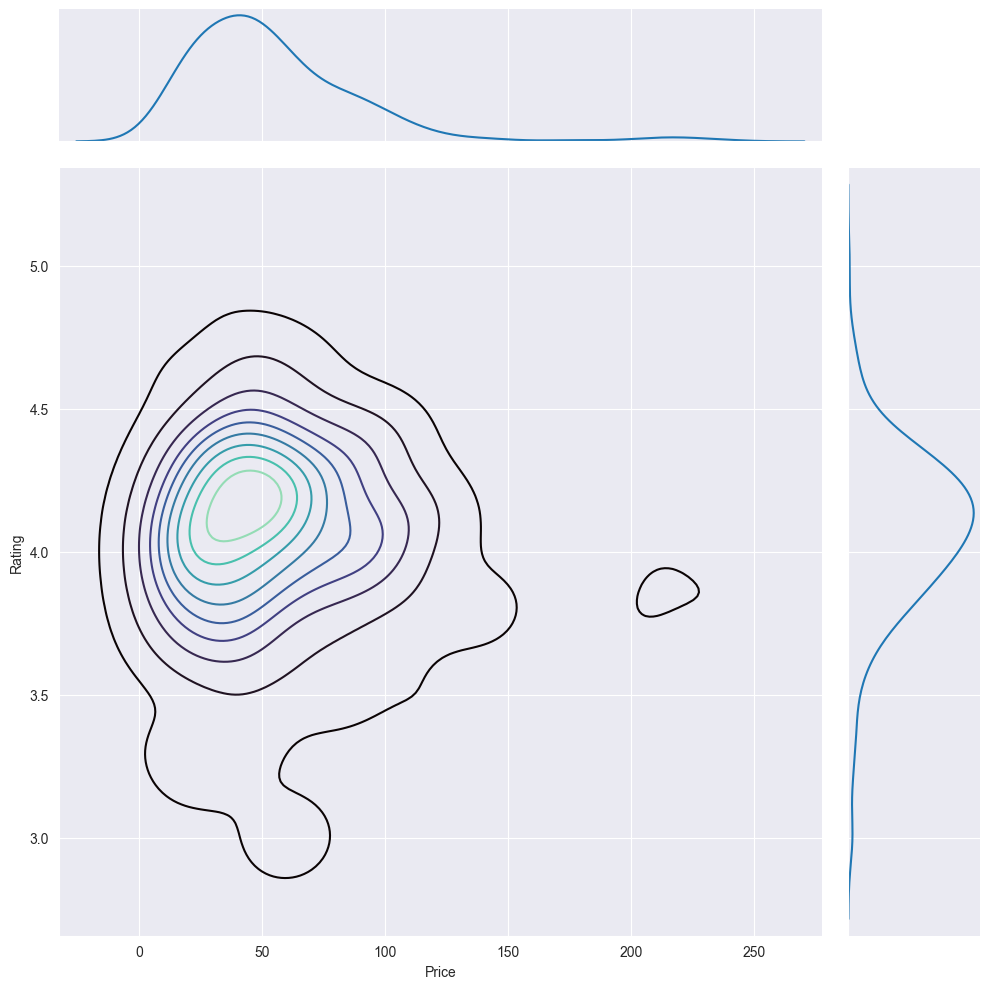

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.jointplot(x=data.Price,
                   y=data.Rating,
                   height=10,
                   kind='kde',
                   cmap='mako')
plt.show()

# Most of the books are in the price range of 40 - 50 dollars and their ratings are in the 4 - 4.5 range

<Figure size 2000x1000 with 0 Axes>

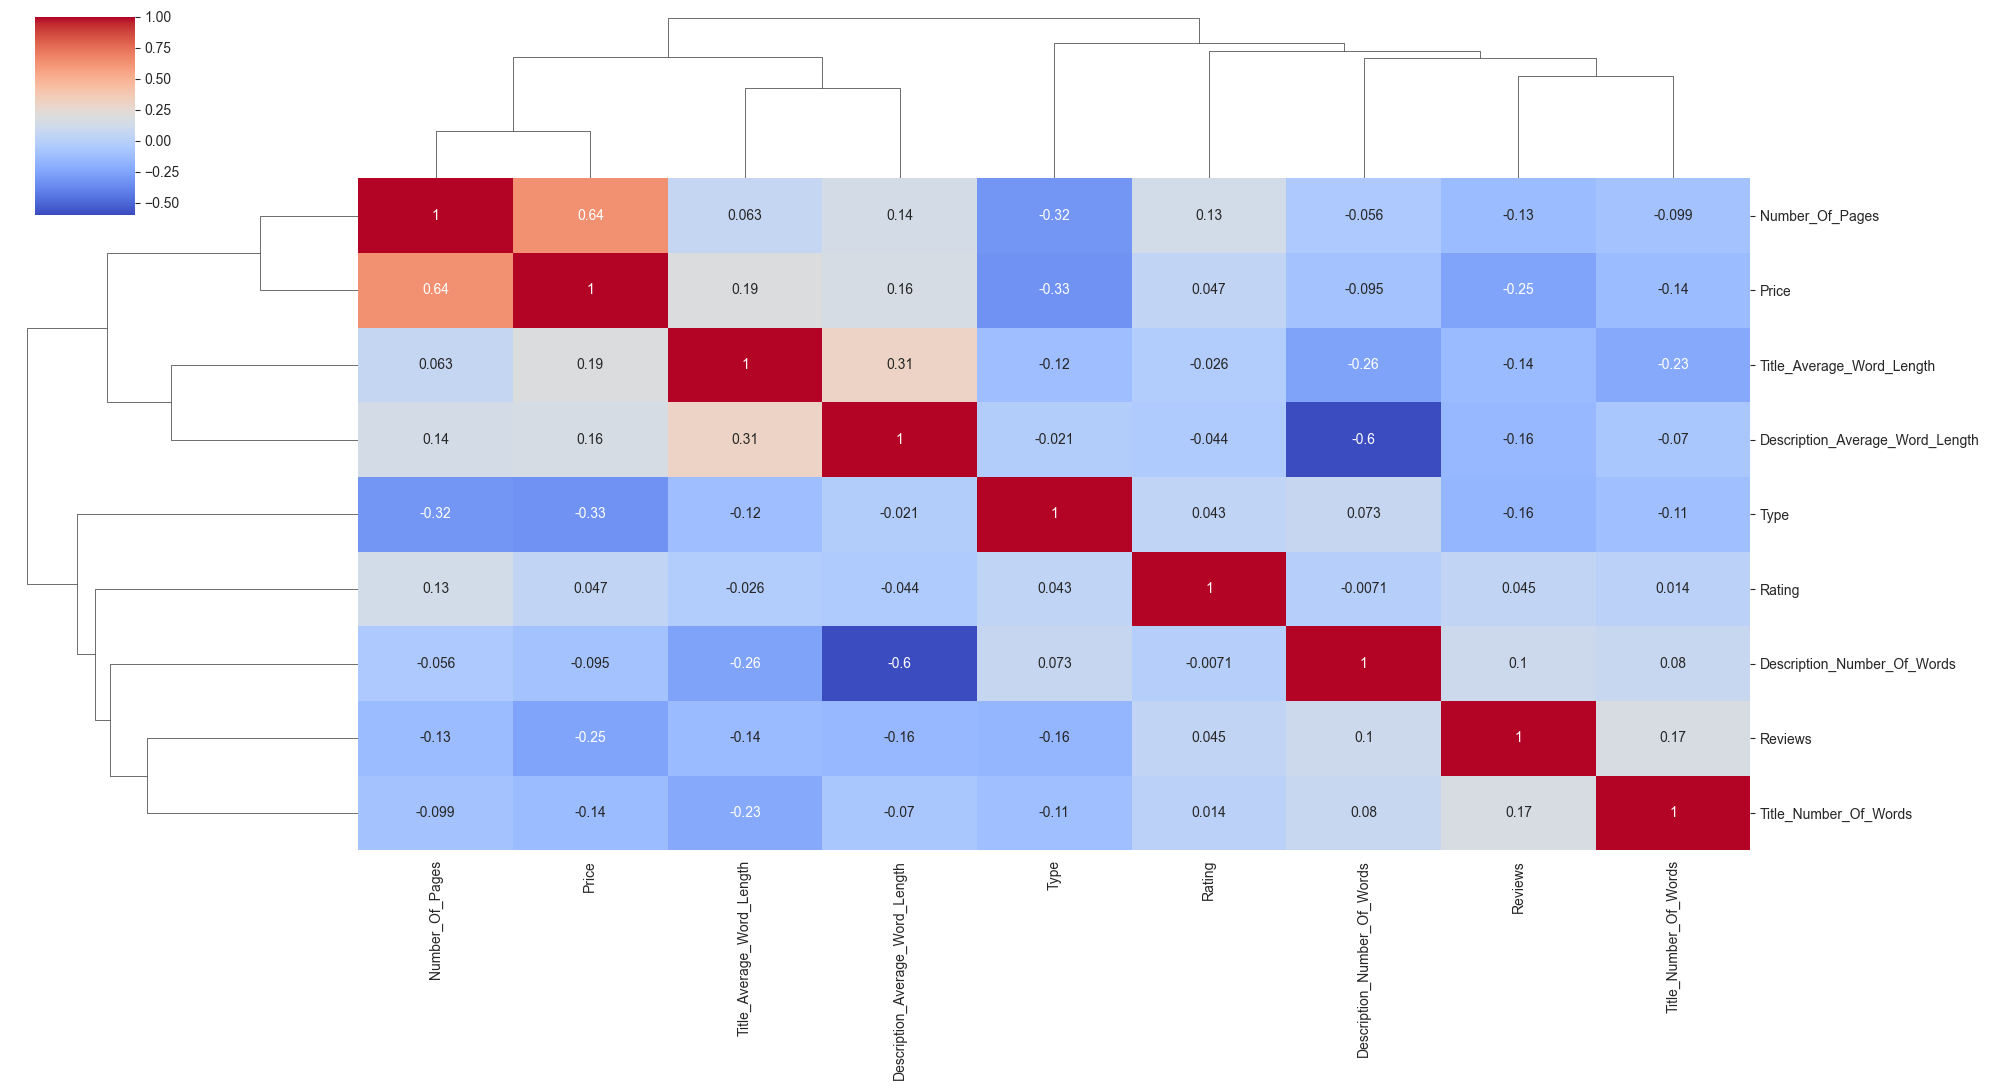

In [ ]:
correlations = data.corr('pearson')
plt.figure(figsize=(20,10))

ax = sns.clustermap(correlations,
                    annot=True,
                    cmap='coolwarm',
                    figsize=(20,11))
warnings.filterwarnings('ignore')